# Linear Regression
`jskyzero` `2017/03/07`

## Overview

+ 有监督式学习：给定一些“正确”的样本。
+ 预测未知的结果：预测一些未知情况的结果。

Train Set -> Learning Algorithm -> Hypothesis(假设)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

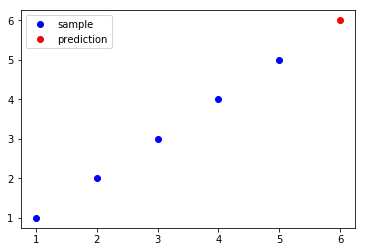

In [2]:
x = [1, 2, 3, 4, 5]
y = [1, 2, 3, 4, 5]
plt.plot(x, y, 'ro', color='b', label="sample")
plt.plot([6], [6], 'ro', color='r', label="prediction")
plt.legend(loc="upper left")

## Cost Function

+ Input: $x$
+ Hypothesis: $h_{\theta}(x) = \theta_0 + \theta_1 x$

怎么得到需要的 $\theta_i$ ?

(数据处理中的核心步骤，衡量数据相似, 需要选择的，就是和代表“正确”的样本相似的)

> for each $x_i$, difference is $(h_\theta(x^{(i)}) - y^{(i)})^2$
>
> then the sum is $H_{cost}(\theta_1, \theta_2) =  \frac{1} {2m}  \sum_{i = 1}^{m}(h_{\theta}(x^{i}) - y^{(i)})^2​$
> 
> We want to minize the sum.

如何求解？
+ 暴力求解，代价太大


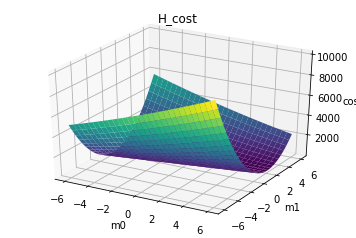

In [3]:
h = lambda m0, m1, x: m0 + m1 * x
cost = lambda m0, m1 : sum([((h(m0, m1, x[i])) - y[i]) ** 2 for i in range(0, 6)])

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = np.vectorize(cost)(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('m0')
ax.set_ylabel('m1')
ax.set_zlabel('cost');
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_title('H_cost');

## Gradient Descent
outline:
+ start with some $\theta_0$, $\theta_1$
+ keep reduce the cost untial find the minimum

update:
+ $\theta_i^{t+1} = \theta_i^{t} - \alpha \frac{\partial}{\partial \theta_i} J(\theta_1, \theta_2) \space | \space i = 1, 2 $

algorithm:

repeat until convergence {

   $\theta_0 = \theta_0 - \alpha \frac{1}{m} \sum_{i = 1}^{m}(h_\theta(x^i) - y^i)$
   
   $\theta_1 = \theta_1 - \alpha \frac{1}{m} \sum_{i = 1}^{m}((h_\theta(x^i) - y^i) * x^i)$

}

为什么会收敛到局部最小值？
+ 函数值变化方向与自变量变化方向
+ 函数递增，更新自变量变小，函数值减少
+ 函数递减，更新自变量变大，函数值减少

其他问题
+ make sure gradient descent is working correctly
+ when to stop?
    + set error, when decrease smaller than error, stop.
    + set change rate, then change smaller than rate, stop.

In [4]:
a = 0.01
is_convergence = lambda m0, m1: cost(m0, m1) < 0.001

m0 = 2
m1 = 2

times = 0

while not is_convergence(m0, m1):
    new_m0 = m0 - a * sum([(h(m0, m1, x[i])) - y[i] for i in range(0, 6)]) / 6
    new_m1 = m1 - a * sum([((h(m0, m1, x[i])) - y[i]) * x[i] for i in range(0, 6)]) / 6
    m0 = new_m0 
    m1 = new_m1
    times = times + 1
    
times

16428

## Multiple features (variables).

+ Input: $x = [x_0, x_1, x_2...x_n]$
+ Hypothesis: $h_\theta(x) = \theta^{T}x = \theta_0 x_0 + \theta_1 x_1 + ... + \theta_n x_n$
+ Cost:
+ Gradient Descent: $\theta_i = \theta_i - \alpha \frac{1}{m} \sum_{j = 1}^{m}((h_\theta(x^j) - y^j) * x_i^j)$
+ Feature Scaling: make sure features are on a similar scale (or it will be the main part of change).
    + make to [-1, 1], 归一化
    

## $\alpha$ 的取值
+ 大小
  + 小：慢
  + 大：不收敛，发散
  + 固定（足够小）：变化率会收敛到0
+ how to set?
  + not working -> use smaller $\alpha$
  + for suffiently small $\alpha$, $J(\theta)$ will always decrease on every iteration.also, the speed will be slow.
  + to choose $\alpha$, try ..., 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3... 

## Normal equation

解析的求出$\theta$的最优解

$J(\theta_0, \theta_1, ..., \theta_m) = \frac{1}{2m}\sum_{i = 1}^{m}(h_\theta(x^i) - y^i)^2$

for every j: $\frac{\alpha}{\alpha \theta_j} J(\theta) = \frac{1}{m} \sum_{i = 1}^{m}((h_\theta(x^i) - y^i) * x^i_j) = 0$

solve for $\theta_0, \theta_1, ..., \theta_m$

> for $X$ one row is a sample
>
> $(X^T X)\space \theta = X^T y$
>
> $\theta = (X^T X)^{-1} X^T y$

### $X^T X$ 不可逆
1. 降维
2. 去除变量中的依赖
3. 矩阵分解，广义逆矩阵


具体的证明请参阅：[最小二乘法](https://zh.wikipedia.org/wiki/%E6%9C%80%E5%B0%8F%E4%BA%8C%E4%B9%98%E6%B3%95)


## 比较

梯度下降：选择$\alpha$, 需要多次迭代，在n很大的时候都可行

求解：计算逆矩阵，$O(n^3)$的复杂度

## Linear Prediction

自回归模型，当前时间点由过去N个点的组合形成

## Reference
1. [alternating direction method of multipliers (ADMM) ](http://stanford.edu/~boyd/admm.html)
2. [CS229 - Machine Learning](https://see.stanford.edu/course/cs229)